# CSE 6367 Programming Assignment 3 (P3)

## Spring 2023

## Eigenfaces

 Import all the required Libraries

In [1]:
import matplotlib.pyplot as plt #plot import
import matplotlib.colors  #color import
import numpy as np  #importing numpy
from PIL import Image #importing PIL to read all kind of images
from PIL import ImageTk
import glob

Defining Functions  

In [2]:
# displaying faces grid
def displaying_faces_grid(displaying_faces):
    size=100, 100
    #fig1=plt.figure('name')
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    count=0
    for x in range(5):
        for y in range (5):
            #if images are taken
            draw_image = displaying_faces[count]
            draw_image.thumbnail(size)
            draw_image= np.asarray(draw_image,dtype=float)/255.0
            #if arrays are taken
            """print_image=faces_list[count]
            print_image.resize((100, 100), refcheck=False)
            #print_image=print_image.resize(size)"""
            image_plot=axes_array[x][y].imshow(draw_image,cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count=count+1
    fig1.canvas.set_window_title('Displaying all faces')
    plt.show()
    
    

In [3]:
# display mean face
def display_mean_face(face_array):
    mean = np.mean(face_array, 0)
    fig2, axes_array = plt.subplots(1, 1)
    fig2.set_size_inches(5, 5)
    image_plot = axes_array.imshow(mean, cmap=plt.cm.gray)
    fig2.canvas.set_window_title('mean faces')
    plt.show()
    return mean

In [4]:
# performing PCA
def performing_pca(face_array):
    print("\nMEAN FACE DISPLAY")
    mean = display_mean_face(face_array)
    # flattening array
    flatten_Array = []
    for x in range(len(face_array)):
        flat_Array = face_array[x].flatten()
        flatten_Array.append(flat_Array)
    flatten_Array = np.asarray(flatten_Array)
    mean = mean.flatten()
    # flatten_Array=flatten_Array.T
    #print(flatten_Array.shape)
    #face_array = face_array.flatten()
    # mean=mean.T
    #substract_mean_from_original = np.subtract(flatten_Array, mean)
    # transpose_substract_mean_from_original=substract_mean_from_original.T
    # eigen_faces=displaying_eigen_faces(face_array,mean)
    #covariance_matrix = np.cov(substract_mean_from_original)
    #eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    return mean,flatten_Array,

In [5]:
# display all Images
def display_all(images):
    fig3, axes_array = plt.subplots(5, 5)
    fig3.set_size_inches(5, 5)
    count = 0
    for x in range(5):
        for y in range(5):
            draw_image = images[count]
            image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count = count + 1
           
    fig3.canvas.set_window_title('Eigen Faces')
    plt.show()

In [6]:
# reading faces and displaying
def reading_faces_and_displaying():
    face_array = []
    displaying_faces = []
    for face_images in glob.glob('./Eigenfaces/Train/*.jpg'): # assuming jpg
        face_image=Image.open(face_images)
        displaying_faces.append(face_image)
        face_image = np.asarray(face_image,dtype=float)/255.0
    
        face_array.append(face_image)
    print("DISPLAYING ORIGINAL FACES\n")
    displaying_faces_grid(displaying_faces)
    face_array=np.asarray(face_array)
    return face_array


# -------------------------------------------------Task 1--------------------------------------------------

### Task 1 (30 points)
1. Load all the 25 images in the "/Eigenfaces/Train"
2. Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

DISPLAYING ORIGINAL FACES



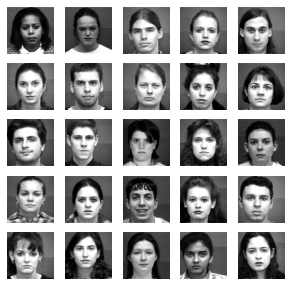


MEAN FACE DISPLAY


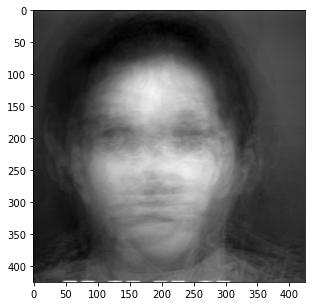


EIGEN FACES


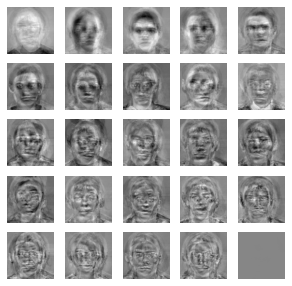

In [7]:

face_array=reading_faces_and_displaying()
mean,flatten_Array=performing_pca(face_array) # eigen_values,eigen_vectors
substract_mean_from_original = np.subtract(flatten_Array, mean)
U, s, V = np.linalg.svd(substract_mean_from_original, full_matrices=False)
Eigen_faces=[]
for x in range(V.shape[0]):
    fig=np.reshape(V[x],(425,425))
    Eigen_faces.append(fig)
print("\nEIGEN FACES")
display_all(Eigen_faces)

# -------------------------------------------------Task 2--------------------------------------------------

### Task 2 (30 points)

1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

In [8]:
# reconstruction of Images
def display_reconstruction(images):
    fig4, axes_array = plt.subplots(5, 5)
    fig4.set_size_inches(5, 5)
    count = 0
    for x in range(5):
        for y in range(5):
            draw_image = np.reshape(images[count,:],(425,425))
            image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count = count + 1
    fig4.canvas.set_window_title('\nReconstructed faces for k='+str(k))
    plt.show()


RECONSTRUCTING FACES FOR K=2


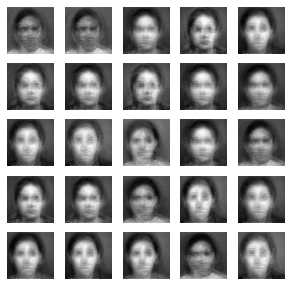


RECONSTRUCTING FACES FOR K=5


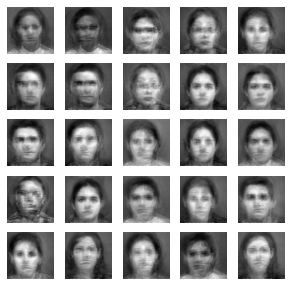


RECONSTRUCTING FACES FOR K=15


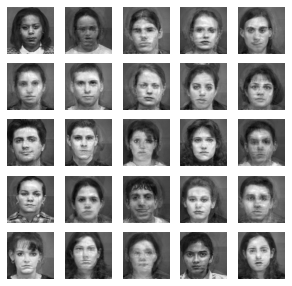

In [9]:
# reconstructing of faces
def reconstructing_faces(k,mean,substract_mean_from_original,V):
    weights=np.dot(substract_mean_from_original, V.T)
    reconstruction = mean + np.dot(weights[:,0:k], V[0:k,:])
    display_reconstruction(reconstruction)
    
k=2
print("\nRECONSTRUCTING FACES FOR K=2")
reconstructing_faces(k,mean,substract_mean_from_original,V)
k=5
print("\nRECONSTRUCTING FACES FOR K=5")
reconstructing_faces(k,mean,substract_mean_from_original,V)
k=15
print("\nRECONSTRUCTING FACES FOR K=15")
reconstructing_faces(k,mean,substract_mean_from_original,V)
#k=25
#reconstructing_faces(k,mean,substract_mean_from_original,V)

# -------------------------------------------------Task 3--------------------------------------------------

### Task 3 (40 points)
1. Load all the test images from "/Eigenfaces/Test"
2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 5, k = 15.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

def class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array):
    eigen_weights = np.dot(V[:k, :],substract_mean_from_original.T)
    threshold = 6000
    result_table = []
    
    for i in range(test_from_mean.shape[0]):
        test_weight = np.dot(V[:k, :],test_from_mean[i:i + 1,:].T)
        distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
        image_closest = np.argmin(np.sqrt(distances_euclidian))
        
        if (distances_euclidian[image_closest] <= threshold):
            result_table.append((test_flat_images[i,:], face_array[image_closest,:,:]))
        else:
            result_table.append((test_flat_images[i,:], None))
    
    return result_table


In [15]:
def class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array):
    eigen_weights = np.dot(V[:k, :],substract_mean_from_original.T)
    threshold = 6000
    M = test_from_mean.shape[0]
    result_table = np.empty((M, 2), dtype=object)
    
    for i in range(M):
        test_weight = np.dot(V[:k, :],test_from_mean[i:i + 1,:].T)
        distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
        image_closest = np.argmin(np.sqrt(distances_euclidian))
        
        result_table[i, 0] = test_flat_images[i,:]
        if (distances_euclidian[image_closest] <= threshold):
            result_table[i, 1] = face_array[image_closest,:,:]
        else:
            result_table[i, 1] = None
    
    return result_table


In [16]:

def display_results(result_table):
    for test_img, closest_img in result_table:
        fig, axes_array = plt.subplots(1, 2)
        fig.set_size_inches(5, 5)
        axes_array[0].imshow(np.reshape(test_img, (425,425)), cmap=plt.cm.gray)
        axes_array[0].axis('off')
        if closest_img is not None:
            axes_array[1].imshow(closest_img, cmap=plt.cm.gray)
        axes_array[1].axis('off')
        plt.show()


In [17]:
def returning_vector(test_images):
    flat_test_Array = []
    for x in range(len(test_images)):
        flat_Array = test_images[x].flatten()
        flat_test_Array.append(flat_Array)
    flat_test_Array = np.asarray(flat_test_Array)
    return flat_test_Array



FACES FOR K=2


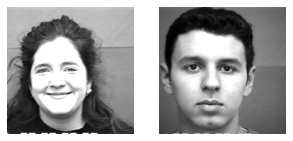

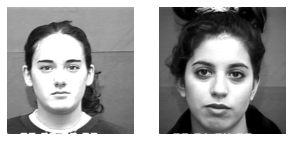

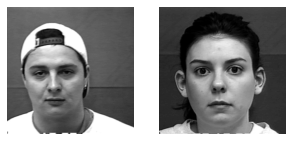

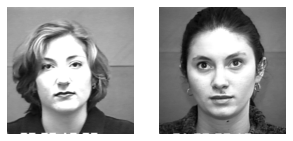

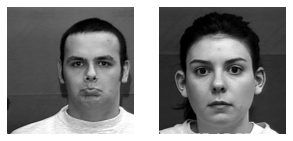

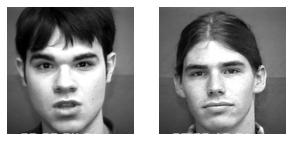

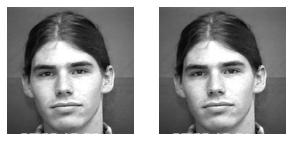

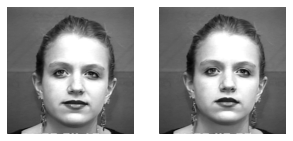

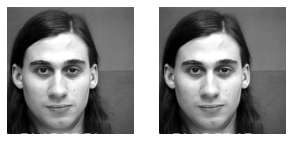

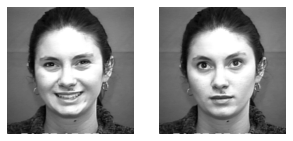

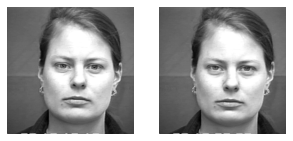

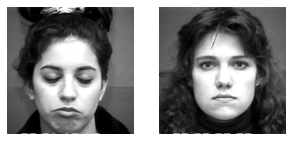

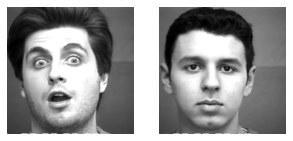

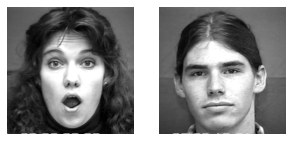

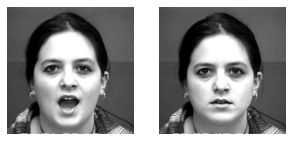

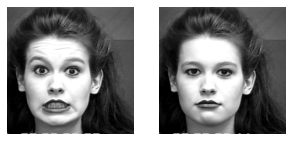

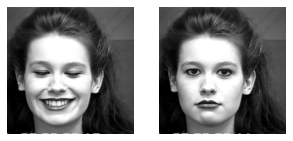

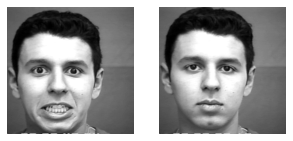

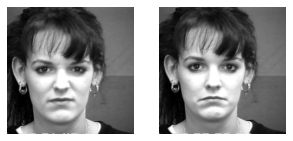

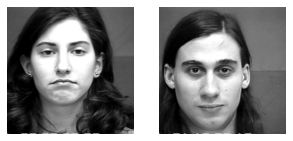

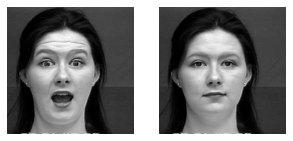

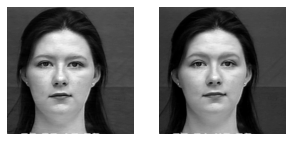

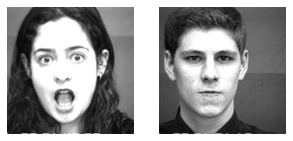

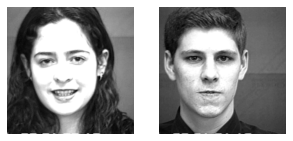

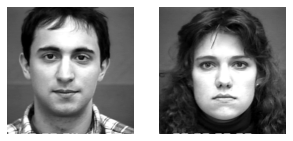

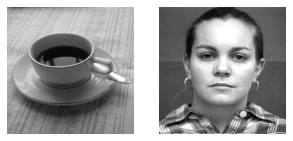

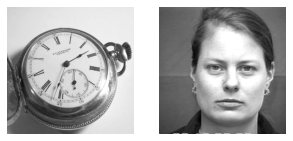

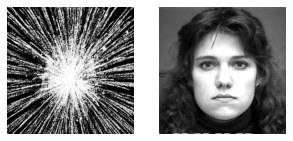

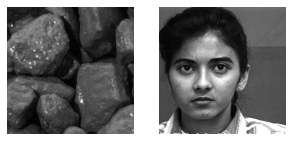

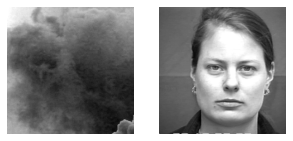

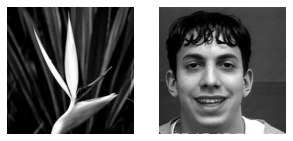

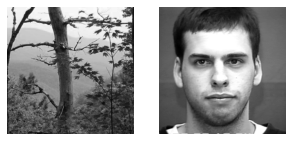

In [18]:
def reading_test_images():
    test_images=[]
    for images in glob.glob('./Eigenfaces/Test/*.jpg'):  # assuming jpg
        test_faces = Image.open(images)
        test_faces = np.asarray(test_faces, dtype=float) / 255.0
        test=(425,425,3)
        if test_faces.shape == test:
            test_faces=test_faces[:,:,0]
            test_images.append(test_faces)
        else:
            test_images.append(test_faces)
    flat_test_Array=returning_vector(test_images)
    test_images=np.asarray(test_images)
    return flat_test_Array,test_images

test_flat_images,test_images=reading_test_images()
test_from_mean=np.subtract(test_flat_images,mean)

k=2
print("FACES FOR K=2")
result_table = class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array)
display_results(result_table)


FACES FOR K=2


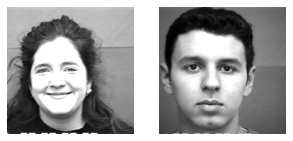

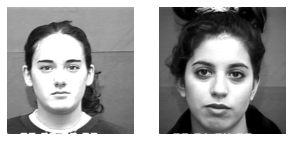

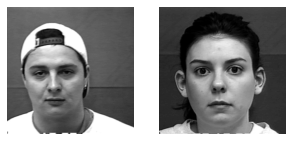

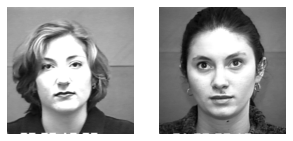

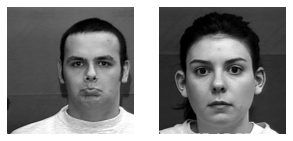

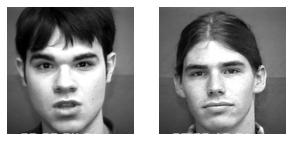

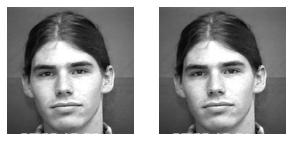

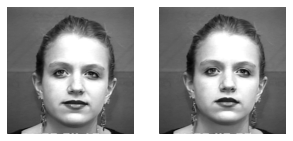

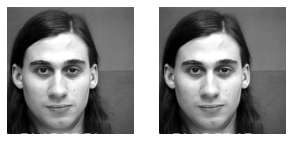

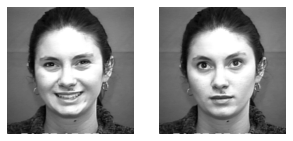

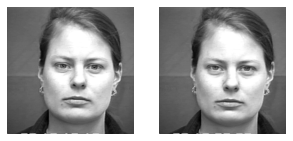

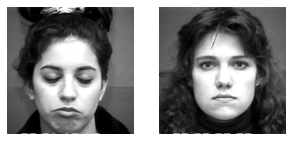

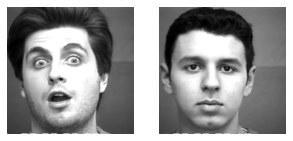

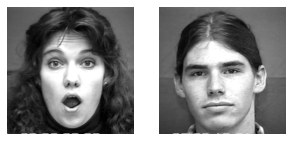

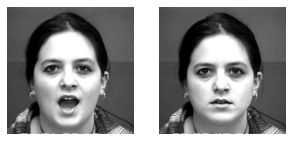

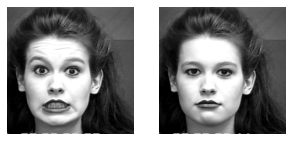

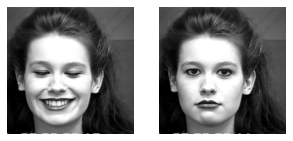

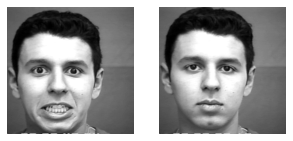

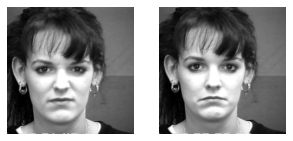

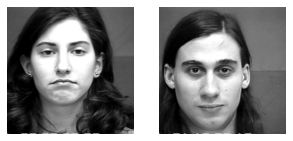

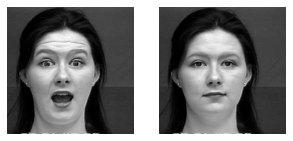

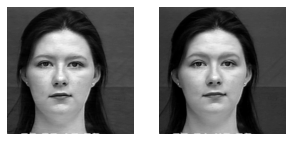

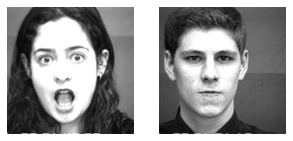

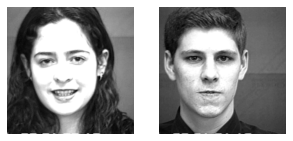

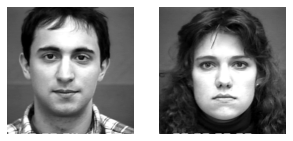

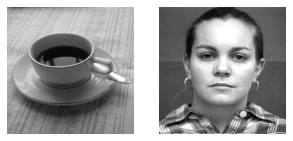

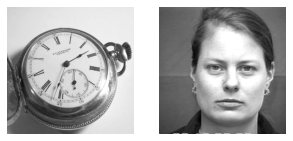

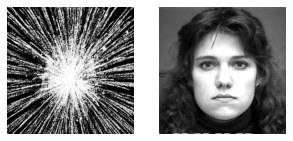

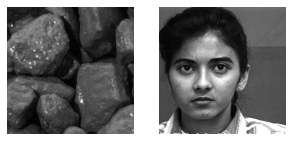

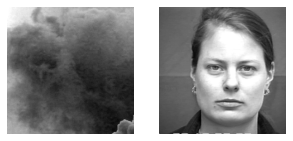

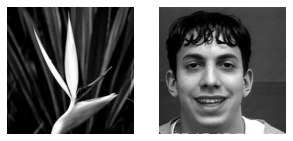

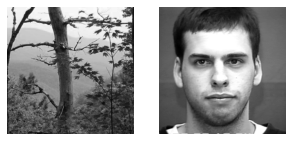

FACES FOR K=5


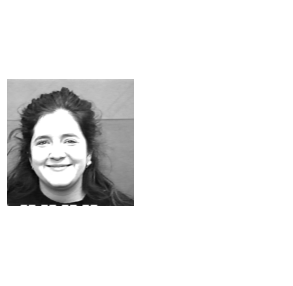

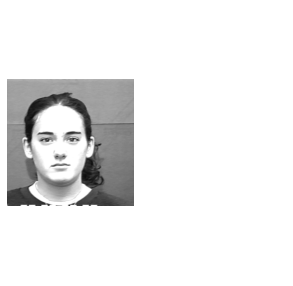

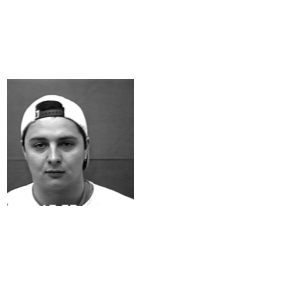

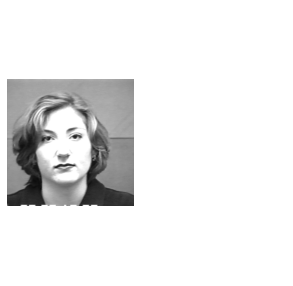

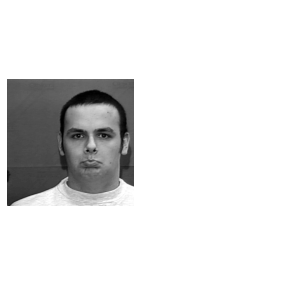

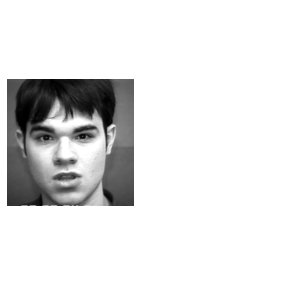

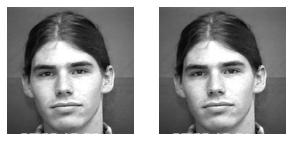

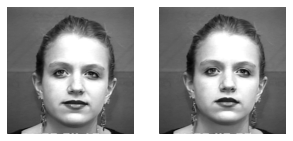

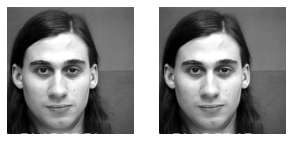

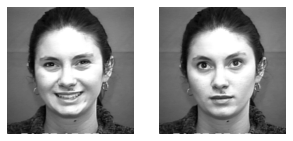

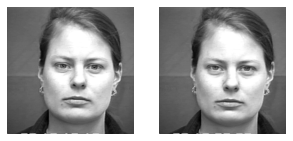

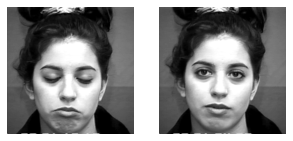

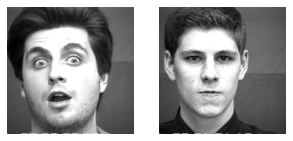

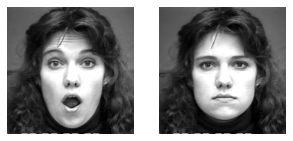

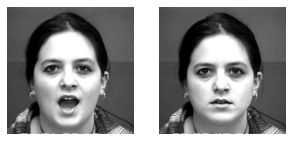

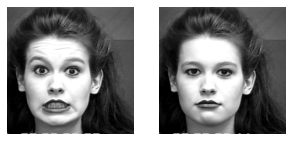

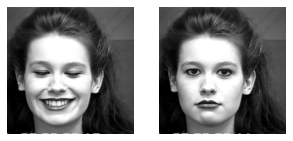

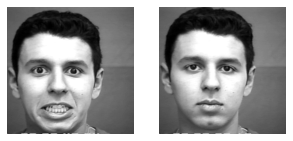

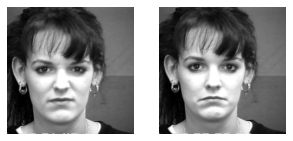

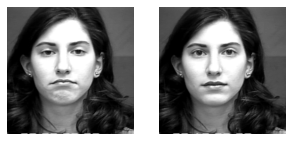

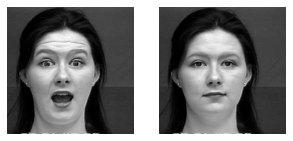

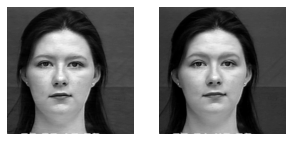

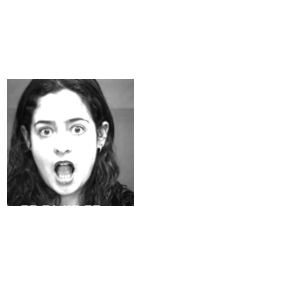

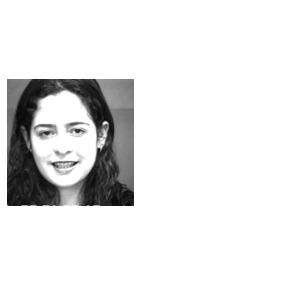

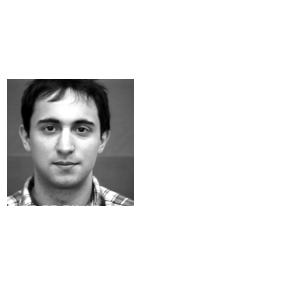

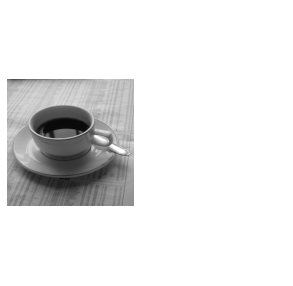

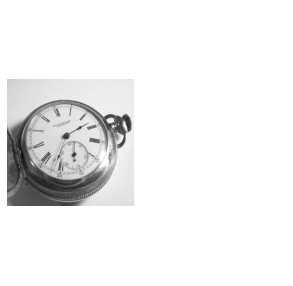

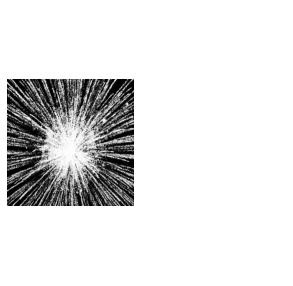

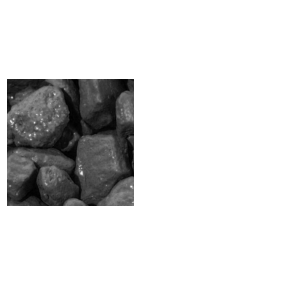

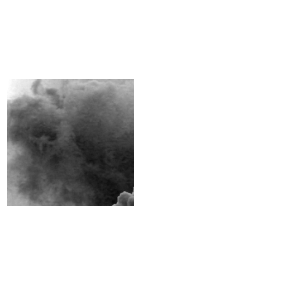

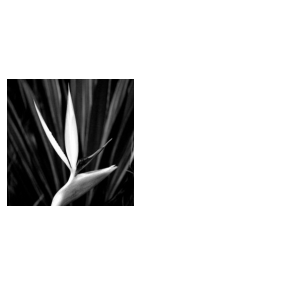

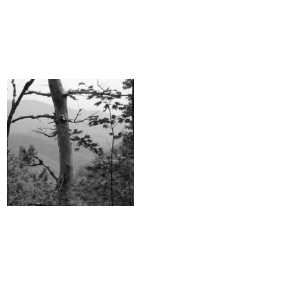

FACES FOR K=15


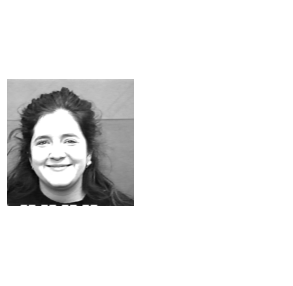

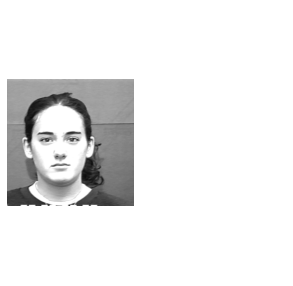

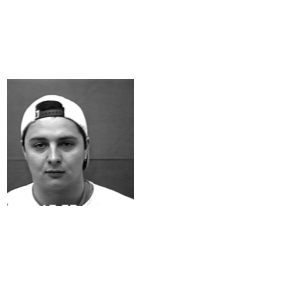

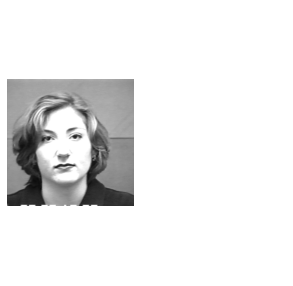

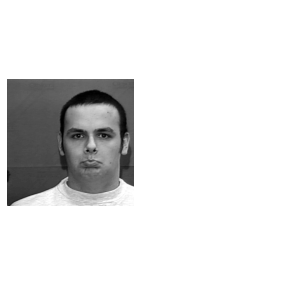

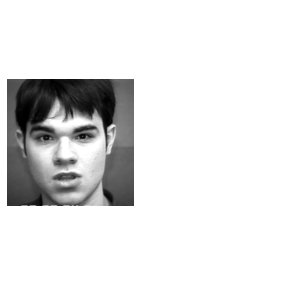

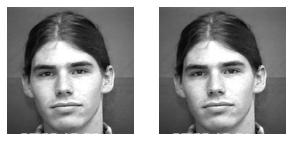

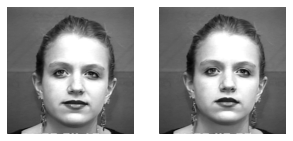

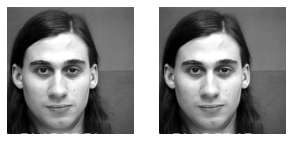

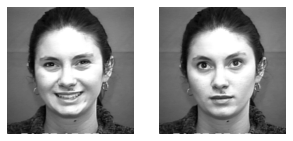

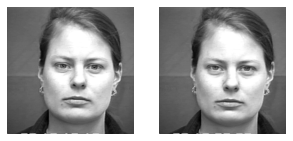

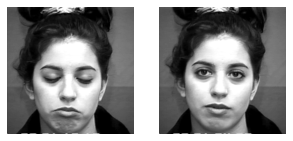

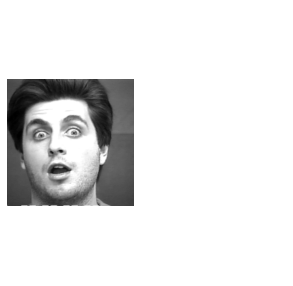

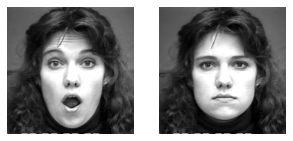

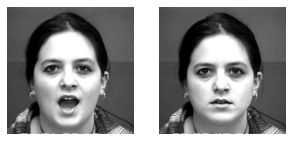

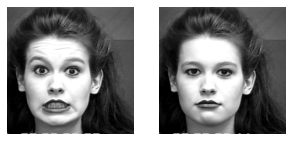

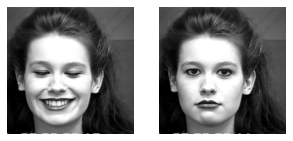

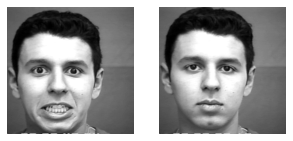

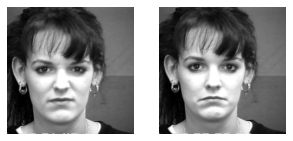

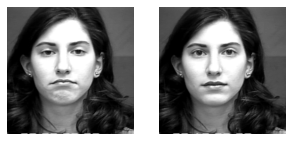

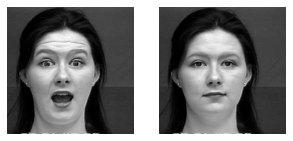

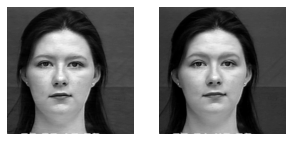

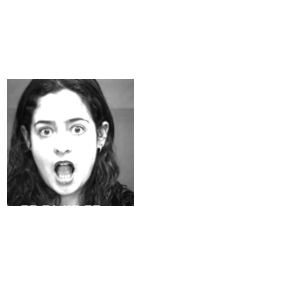

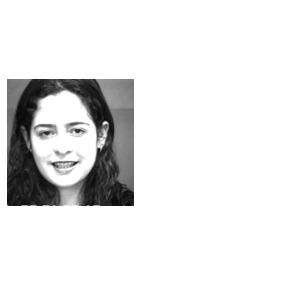

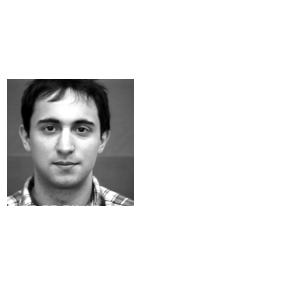

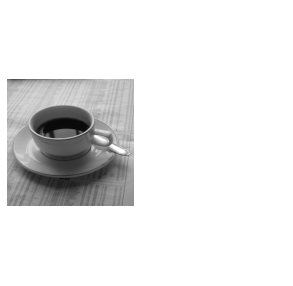

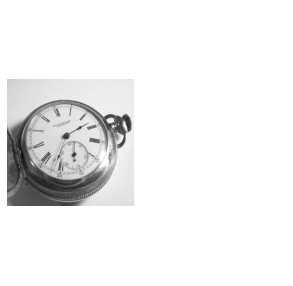

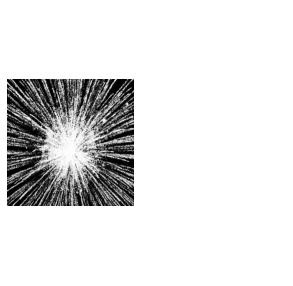

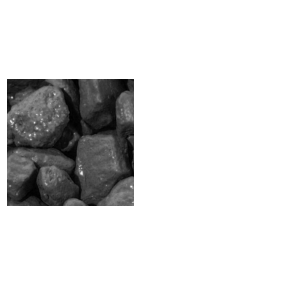

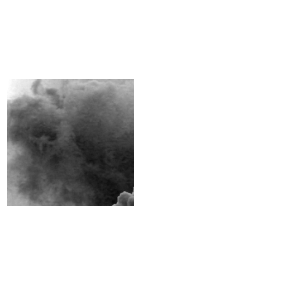

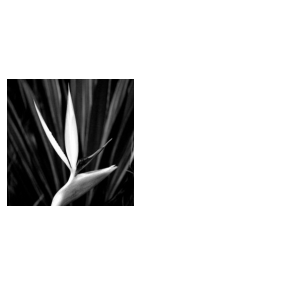

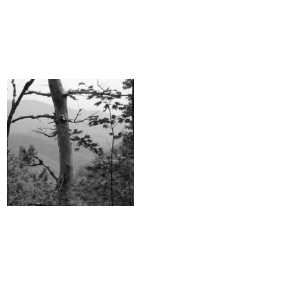

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

def class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array):
    eigen_weights = np.dot(V[:k, :],substract_mean_from_original.T)
    threshold = 1000
    result_table = []
    
    for i in range(test_from_mean.shape[0]):
        test_weight = np.dot(V[:k, :],test_from_mean[i:i + 1,:].T)
        distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
        image_closest = np.argmin(np.sqrt(distances_euclidian))
        
        if (distances_euclidian[image_closest] <= threshold):
            result_table.append((test_flat_images[i,:], face_array[image_closest,:,:]))
        else:
            result_table.append((test_flat_images[i,:], None))
    
    return result_table

def display_results(result_table):
    for test_img, closest_img in result_table:
        fig, axes_array = plt.subplots(1, 2)
        fig.set_size_inches(5, 5)
        axes_array[0].imshow(np.reshape(test_img, (425,425)), cmap=plt.cm.gray)
        axes_array[0].axis('off')
        if closest_img is not None:
            axes_array[1].imshow(closest_img, cmap=plt.cm.gray)
        axes_array[1].axis('off')
        plt.show()

# ... (other functions remain the same)

test_flat_images,test_images=reading_test_images()
test_from_mean=np.subtract(test_flat_images,mean)

k_values = [2, 5, 15]
for k in k_values:
    print(f"FACES FOR K={k}")
    result_table = class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array)
    display_results(result_table)
